In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
deliveries=pd.read_csv('/content/gdrive/My Drive/datasets/deliveries.csv')

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches=pd.read_csv('/content/gdrive/My Drive/datasets/matches.csv')

In [ ]:
matches['date']=pd.to_datetime(matches.date)
matches.sort_values('date' ,inplace=True)
matches.reset_index(inplace=True)
matches.drop(['index','id'],inplace=True,axis=1)

matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [ ]:
matches.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             749 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object   

In [ ]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches[matches['city'].isnull()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
cities=matches['city'].fillna('Dubai')
matches['city']=cities


In [ ]:
matches['team1'].unique()
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
matches.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},regex=True,inplace=True)
matches.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
matches['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [ ]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Mohali'], dtype=object)

In [ ]:
matches.replace({'Bengaluru':'Bangalore'},regex=True,inplace=True)

In [ ]:
y=pd.get_dummies(matches['toss_decision'],prefix='elected')
matches['elected_bat']=y['elected_bat']
matches['elected_field']=y['elected_field']
matches.drop(['toss_decision'],axis=1,inplace=True)
matches.drop(['umpire3'],axis=1,inplace=True)
matches.head()

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0,1
1,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,1,0
2,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,1,0
3,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,1,0
4,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,1,0


In [ ]:
# matches['winner'].dropna()
# matches.head()
matches.isna().sum()
matches.dropna(inplace = True)
matches.head()
  

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0,1
1,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,1,0
2,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,1,0
3,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,1,0
4,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,1,0


In [ ]:
matches.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
elected_bat        0
elected_field      0
dtype: int64

In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# EDA

MOST NUMBER OF WINS IN EVERY SEASONS

In [ ]:
df=pd.DataFrame(columns=['year','Team','No of Wins'])

for x in range(2008,2020):
  temp=matches[matches['season']==x]
 
  temp2=temp['winner'].value_counts()[:1].rename_axis('Team').reset_index(name='No of Wins')
  temp2['year']=x
  df=df.append({'year':x,'Team':temp2['Team'][0],'No of Wins':temp2['No of Wins'][0]},ignore_index=True)
df





,year,Team,No of Wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Capitals,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Mumbai Indians,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


In [ ]:
df['year']=df['year'].astype(str)
fig1=px.bar(df,x='year',y='No of Wins',color='Team',title='Maximum no of matches won by any team every season')
fig1.show()

**VENUE WHICH HOSTED MAXIMUM NUMBER OF MATCHES**

In [ ]:
demo=matches['venue'].value_counts().rename_axis('Venue').reset_index(name='Total Matches Hosted')
demo





,Venue,Total Matches Hosted
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,70
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


EDEN GARDEN HOSTED THE MAXIMUM NUMBER OF MATCHES(77) FOLLOWED BY THE WANKHEDE STADIUM(73)

In [ ]:
fig2=px.bar(demo,x='Total Matches Hosted',y='Venue',orientation='h')
fig2.update_layout(title_text='Different Venues',yaxis=dict(autorange="reversed"))
fig2.update_traces(marker_color='red')
fig2.show()
    


**TEAM WINNING MAXIMUM NUMBER OF MATCHES**

In [ ]:
win=matches['winner'].value_counts()[:15].rename_axis('Team').reset_index(name='Total Matches Won')
win

,Team,Total Matches Won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,83
4,Kings XI Punjab,82
5,Delhi Capitals,76
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


We see that MUMBAI INDIANS has won the maximum number of matches

In [ ]:
fig3=px.bar(win,x='Team',y='Total Matches Won',title='Total matches won by all the teams')
fig3.show()

In [ ]:
demo1=matches['team1'].value_counts()[:].rename_axis('Team').reset_index(name='Total Matches 1')
demo2=matches['team2'].value_counts()[:].rename_axis('Team').reset_index(name='Total Matches 2')
df=pd.merge(demo1,demo2,how='inner',on='Team')
df['Total Matches Played']=df['Total Matches 1']+df['Total Matches 2']
df=pd.merge(df,win,how='inner',on='Team')
df['Percentage Won']=(df['Total Matches Won']/df['Total Matches Played'])*100
df
#Total Matches 1 correspond to the number of matches played by a team as team 1
#Total Matches 2 correspond to the number of matches played by the team as team 2

,Team,Total Matches 1,Total Matches 2,Total Matches Played,Total Matches Won,Percentage Won
0,Mumbai Indians,101,86,187,109,58.288770
1,Kings XI Punjab,91,85,176,82,46.590909
2,Chennai Super Kings,89,75,164,100,60.975610
3,Kolkata Knight Riders,83,95,178,92,51.685393
4,Royal Challengers Bangalore,82,94,176,83,47.159091
5,Delhi Capitals,76,97,173,76,43.930636
6,Rajasthan Royals,67,78,145,75,51.724138
7,Sunrisers Hyderabad,62,45,107,58,54.205607
8,Deccan Chargers,43,32,75,29,38.666667
9,Pune Warriors,20,25,45,12,26.666667


In [ ]:
fig=px.bar(df,x='Team',y='Percentage Won',title='Percentage of Matches Won')

fig.show()

CHENNAI SUPER KINGS HAS WON THE MOST PERCENTAGE OF MATCHES ALTHOUGH MUBAI INDIANS HAS WON MOST NUMBER OF MATCHES

TOP 10 HOSTING CITIES

In [ ]:
host=matches['city'].value_counts()[:10].rename_axis('City').reset_index(name='Matches Hosted')
fig=px.pie(host,values='Matches Hosted',names='City',title='Top 10 Hosting Cities')
fig.show()

In [ ]:
df1=matches['player_of_match'].value_counts()[:].rename_axis('Player of Match').reset_index(name='count')
#Taking Top 15 out of this data frame
df1=df1[:15]
df1

,Player of Match,count
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


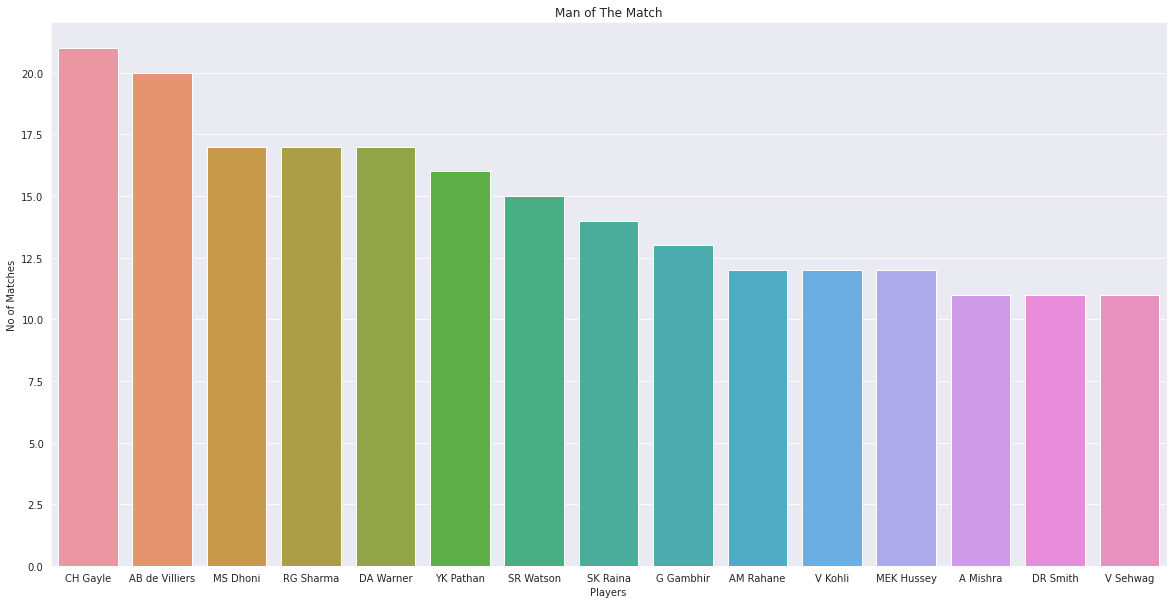

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.barplot(x=df1['Player of Match'],y=df1['count'],dodge=False)
plt.xlabel('Players')
plt.ylabel('No of Matches')
plt.title('Man of The Match')
plt.show()

CHRIS GAYLE HAS EARNED THE MAXIMUM NUMBER OF THE MAN OF THE MATCH AWARDS

# TOSS ANALYSIS

In [ ]:
temp=matches['toss_winner'].value_counts()[:].rename_axis('Team').reset_index(name='Toss Won')
temp
df=pd.merge(df,temp,how='inner',on='Team')
df['Toss win percentage']=(df['Toss Won']/df['Total Matches Played'])*100
df

,Team,Total Matches 1,Total Matches 2,Total Matches Played,Total Matches Won,Percentage Won,Toss Won,Toss win percentage
0,Mumbai Indians,101,86,187,109,58.288770,98,52.406417
1,Kings XI Punjab,91,85,176,82,46.590909,81,46.022727
2,Chennai Super Kings,89,75,164,100,60.975610,89,54.268293
3,Kolkata Knight Riders,83,95,178,92,51.685393,92,51.685393
4,Royal Challengers Bangalore,82,94,176,83,47.159091,79,44.886364
5,Delhi Capitals,76,97,173,76,43.930636,88,50.867052
6,Rajasthan Royals,67,78,145,75,51.724138,78,53.793103
7,Sunrisers Hyderabad,62,45,107,58,54.205607,46,42.990654
8,Deccan Chargers,43,32,75,29,38.666667,43,57.333333
9,Pune Warriors,20,25,45,12,26.666667,20,44.444444


In [ ]:
fig=px.bar(df,x='Team',y='Toss win percentage',title='Percentage of Toss won by various teams')
fig.update_traces(marker_color='violet')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

DECCAN CHARGERS WAS THE MOST LUCKY TEAM FOLLOWED BY THE KOCHI TUSKERS KERALA

# TOP 10 GREATEST VICTORIES

In [ ]:
temp=matches.sort_values('win_by_runs',ascending=False)
temp['team1 v/s team2']=0
temp



,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field,team1 v/s team2
620,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,0,1,0
560,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,0,1,0
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0,1,0
496,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,0,1,0
352,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2011,Hyderabad,2011-05-10,Deccan Chargers,Pune Warriors,Deccan Chargers,normal,0,Pune Warriors,0,6,MR Marsh,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AM Saheba,1,0,0
469,2015,Mumbai,2015-04-17,Mumbai Indians,Chennai Super Kings,Mumbai Indians,normal,0,Chennai Super Kings,0,6,A Nehra,Wankhede Stadium,AK Chaudhary,M Erasmus,1,0,0
468,2015,Visakhapatnam,2015-04-16,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,normal,0,Rajasthan Royals,0,6,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,0,1,0
467,2015,Pune,2015-04-15,Kings XI Punjab,Delhi Capitals,Kings XI Punjab,normal,0,Delhi Capitals,0,5,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,1,0,0


In [ ]:
temp=temp[:5]
temp

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field,team1 v/s team2
620,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,0,1,0
560,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,0,1,0
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0,1,0
496,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,0,1,0
352,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,0,1,0


In [ ]:
for x in range(5):
  
  temp['team1 v/s team2'].iloc[x]=(temp['team1'].iloc[x]+' v/s '+temp['team2'].iloc[x])if temp['winner'].iloc[x]==temp['team1'].iloc[x] else (temp['team2'].iloc[x]+' v/s '+temp['team1'].iloc[x])
  
fig=px.bar(temp,x='win_by_runs',y='team1 v/s team2',orientation='h')

fig.show()

In [ ]:
temp=matches.sort_values('win_by_wickets',ascending=False)
temp['team1 v/s team2']=0
temp

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field,team1 v/s team2
124,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,0,1,0
332,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,0,1,0
579,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0,1,0
667,2018,Indore,2018-05-14,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,0,1,0
316,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2013,Mumbai,2013-04-09,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,0,Mumbai Indians,44,0,KD Karthik,Wankhede Stadium,M Erasmus,VA Kulkarni,1,0,0
329,2013,Jaipur,2013-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,normal,0,Rajasthan Royals,19,0,SK Trivedi,Sawai Mansingh Stadium,Aleem Dar,S Das,0,1,0
328,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,1,0,0
326,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,1,0,0


In [ ]:
temp=temp[:5]
temp

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field,team1 v/s team2
124,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,0,1,0
332,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,0,1,0
579,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0,1,0
667,2018,Indore,2018-05-14,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,0,1,0
316,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,1,0,0


In [ ]:
for x in range(5):
  
  temp['team1 v/s team2'].iloc[x]=(temp['team1'].iloc[x]+' v/s '+temp['team2'].iloc[x])if temp['winner'].iloc[x]==temp['team1'].iloc[x] else (temp['team2'].iloc[x]+' v/s '+temp['team1'].iloc[x])
  
fig=px.bar(temp,x='win_by_wickets',y='team1 v/s team2',orientation='h',title='Top 5 win by wickets in the history of IPL')

fig.show()

# BATSMAN COMPARISON


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
def comparison(total):
  
  list=[]
  for x in range(total):
    batsman=input('Enter the name of the Batsman:')
    t=deliveries[deliveries['batsman']==batsman]
    total_runs=t['batsman_runs'].sum()
    list.append([batsman,total_runs])
  df3=pd.DataFrame(list,columns=['batsman','total_runs'])
  fig=px.scatter(df3,x='batsman',y='total_runs',size='total_runs')
  return(fig)

In [ ]:
#comparison(10)

# TEAM1 V/S TEAM2


In [ ]:
def team1vsteam2(team1,team2):
  temp=matches[(matches['team1']==team1)&(matches['team2']==team2)|(matches['team1']==team2)&(matches['team2']==team1)]
  temp=temp[['season','team1','team2','winner']].reset_index().drop(columns='index')
  plt.figure(figsize=(20,10))
  sns.countplot(x='season', data=temp,hue='winner')
  plt.show()
  #fig=px.histogram(temp,x='season',color='winner',barmode='group')
  #fig.show()
   


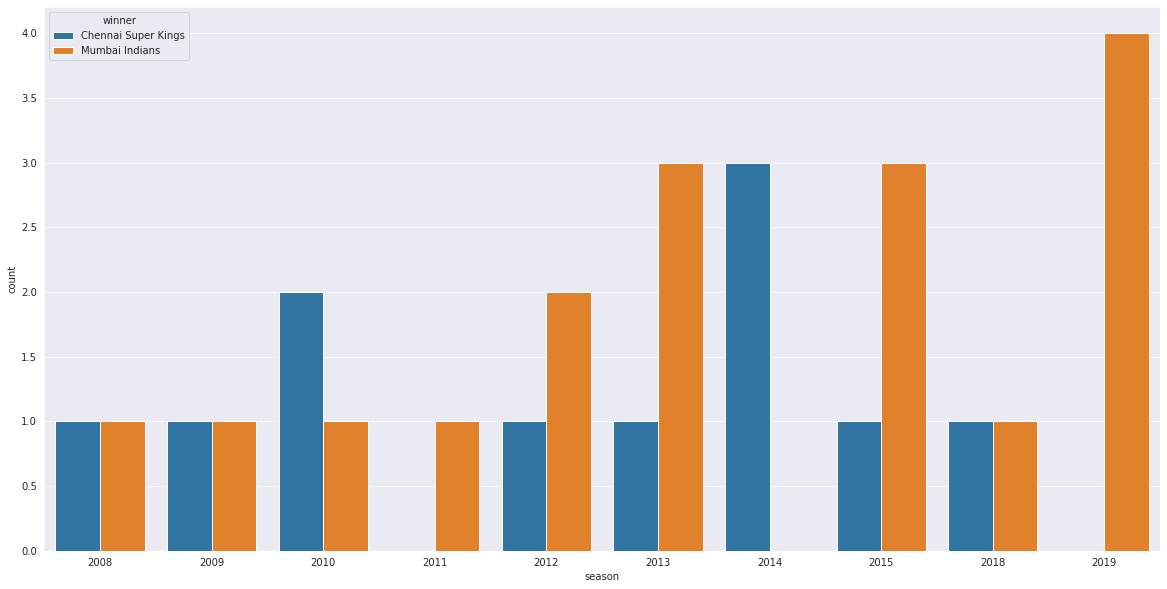

In [ ]:
team1vsteam2('Mumbai Indians','Chennai Super Kings')

# MOST 50s AND 100s

In [ ]:
ball=deliveries
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
ball.drop(columns=['bowler','extra_runs','non_striker','bowler','is_super_over','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','total_runs','player_dismissed','dismissal_kind','fielder'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,0
...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,1
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,2
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,1
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,2


In [ ]:
lst=[]
columns=['batsman','fifties','hundreds']
batsmen=ball['batsman'].unique()
for batsman in batsmen:
  temp=ball[ball['batsman']==batsman]
  temp=temp.groupby(by=['match_id']).sum()['batsman_runs'].reset_index()
  fifty=0
  hundred=0
  for runs in temp['batsman_runs']:
    if((runs>=50)and (runs<100)):
      fifty=fifty+1
    elif(runs>=100):
      hundred=hundred+1
    else:
      pass
  lst.append([batsman,fifty,hundred])
final=pd.DataFrame(lst,columns=columns)




In [ ]:
final=final.sort_values('fifties',ascending=False).reset_index().drop(columns='index')
final

,batsman,fifties,hundreds
0,DA Warner,44,4
1,SK Raina,38,1
2,V Kohli,38,5
3,S Dhawan,37,0
4,RG Sharma,36,1
5,G Gambhir,36,0
6,AB de Villiers,34,3
7,CH Gayle,28,7
8,AM Rahane,27,2
9,RV Uthappa,24,0


In [ ]:
final1=final.iloc[:25]
final1

,batsman,fifties,hundreds
0,DA Warner,44,4
1,SK Raina,38,1
2,V Kohli,38,5
3,S Dhawan,37,0
4,RG Sharma,36,1
5,G Gambhir,36,0
6,AB de Villiers,34,3
7,CH Gayle,28,7
8,AM Rahane,27,2
9,RV Uthappa,24,0


In [ ]:
fig=px.line(final1,x='batsman',y='fifties',title='Most fifties')
fig.show()

In [ ]:
final=final.sort_values('hundreds',ascending=False).reset_index().drop(columns='index')

In [ ]:
final2=final[:15]
final2

,batsman,fifties,hundreds
0,CH Gayle,28,7
1,V Kohli,38,5
2,DA Warner,44,4
3,SR Watson,19,4
4,AB de Villiers,34,3
5,AM Rahane,27,2
6,KL Rahul,15,2
7,V Sehwag,16,2
8,RG Sharma,36,1
9,MK Pandey,15,1


In [ ]:
fig=px.line(final2,x='batsman',y='hundreds',title='Most 100 Scored ')
fig.show()

In [ ]:
matches.head()

,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,elected_bat,elected_field
0,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0,1
1,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,1,0
2,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,1,0
3,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,1,0
4,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,1,0


In [ ]:
matches['elected_bat'].sum()

291

In [ ]:
matches['elected_field'].sum()

459

In [ ]:
columns=['season','elected_bat','elected_field']
lst=[]
for x in range(2008,2020):
  temp=matches[matches['season']==x]
  elected_bat=temp['elected_bat'].sum()
  elected_field=temp['elected_field'].sum()
  lst.append([x,elected_bat,elected_field])
plot=pd.DataFrame(lst,columns=columns)
  

In [ ]:
#plt.figure(figsize=(20,10))
#sns.countplot(x='season', data = plot, hue = 'winner')
#plt.show()
fig=px.bar(plot,x='season',y='elected_bat',color='elected_field',title='Toss Decisions over the years')
fig.show()

INFERENCE:




*   BEST PLAYER OF THE TOURNAMENT OVER THE YEARS IS UNDOUBTEDLY CHRISTOPHER HENRY GAYLE FOLLOWED BY ABD.
*   MI HAD THE MOST NUMBER OF WINS IN THE TOURNAMENT OVER THE YEARS WHILE CSK HAD THE MAXIMUM PERCENTAGE OF WINS.

*   OVERALL TEAMS WINNING THE TOSS HAVE PREFERABLY DECIDED TO FIELD MORE OFTEN THAN ELECTING TO BAT
*   INITIALLY TILL 2013 TEAMS PREFERRED TO BAT FIRST. THIS TREND CHANGED AFTER 2013 WHEN WINNING TEAMS PREFERRED TO FIELD FIRST







